In [4]:
#import required libraries - we do need the models, flatten, dense, input layers 
import numpy as np 
import pandas as pd
from glob import glob 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [5]:
# Path for train, validation and test datasets
train_path = 'test/train'
valid_path = 'test/train'
test_path = 'test/test' 

IMAGE_SIZE = [224, 224] #Default image size for VGG16 

folders = glob('test/train/*') #Get number of classes


# ImageDataGenerator can help perform augumentation on existing images. This way, we get more diverse train set.
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

#Through flow_from_directory - we create an array of images that can be used for training. 
training_set = train_datagen.flow_from_directory('test/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

validation_set = validation_datagen.flow_from_directory('test/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 5123 images belonging to 2 classes.
Found 5123 images belonging to 2 classes.
Found 2 images belonging to 1 classes.


In [7]:
# Create a VGG16 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
#vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #Training with Imagenet weights

# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense(len(folders), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes

#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
#Compile the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(training_set, validation_data=validation_set, epochs=1, batch_size=32)

81/81 [==============================] - 1423s 18s/step - loss: 0.6594 - accuracy: 0.6617 - val_loss: 0.5930 - val_accuracy: 0.7084


In [11]:
print("start")
scores = model.evaluate(training_set)
print("end")

start
81/81 [==============================] - 684s 8s/step - loss: 0.6534 - accuracy: 0.6660
end


In [26]:
model.save_weights('alzheimer_model.h5')
print(np.size(model.layers))
#functie aici cu parametru path
img_path = "test/train/yes/moderateDem0.jpg"
img = plt.imread(img_path)
plt.imshow(img)
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)

x=np.round(classes[0][0])
y=np.round(classes[0][1])
if x==1.0:
    print("nu")
else:
    print("da")

AttributeError: 'Conv2D' object has no attribute 'save_weights'

nu


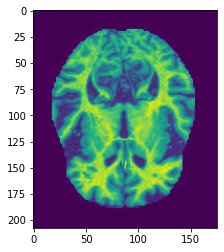

In [13]:

img_path = "test/train/no/nonDem226.jpg"
img = plt.imread(img_path)
plt.imshow(img)
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)

x=np.round(classes[0][0])
y=np.round(classes[0][1])
if x==1.0:
    print("nu")
else:
    print("da")